In [2]:
from IPython.display import display, HTML
display(
    HTML("""
<style>
* {font-family:D2Coding;}
div.container{width:87% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input { font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:3px;}
table.dataframe{font-size:12px;}
</style>
"""))


# <span style='color:red'>Ch2. 한글 형태소 분석 </span>

# 1. 자연어 처리

- 자연어 : 일상적인 언어
- 자연어 처리 분야 :
    * 자연어 이행 : 형태소분석 → postagging → 의미분석, 시각화
    * 자연어 생성 : RNN, LSTM, GRU, ... , encoder-decoder알고리즘 → 트랜스포머알고리즘
- 활용분야 : 트랜드분석, 탐색적 분석, 맞춤법검사, 번역기, 챗봇
- [huggingface] https://huggingface.co/
- [opanai-model] https://platform.openai.com/docs/models


# 2. 자연어 이해 처리 절차

- 전처리 : 단어, 어절 추출
- 분석 후보 생성 : 형태소 분리, 품사태깅(pos tagging)
- 제약조건(불용어 처리) : 규칙확인
- 분석 : 시각화(워드클라우드), 연관분석, RNN, LSTM, GRU, ...

# 3. 한글형태소 분석 엔진 (Konlpy,...)

- 공통기능 : morphs(형태소 나누기), nouns(명사추출), pos(형태소로 나누어 품사 태그)
- konlpy (pip install konlpy)
    * HanNaum : 자바로 만든 형태소 분석기 (JAVA_HOME 시스템환경변수, Path설정)
    * Kkma        : 자바로 만든 형태고 분서기 (JAVA_HOME 스스템환경변수, Path설정)
    * Komoran  : 자바로 만든 형태고 분서기 (JAVA_HOME 스스템환경변수, Path설정)
    * Okt
- Mecab (pip install python-mecab-ko)
    * Mecab      : c++ 로 만든 형태고 분석기. 저사양환경에서 사용 가능. 다국어 바인딩 지원

In [42]:
import os
print(os.environ.get('JAVA_HOME'))

/opt/homebrew/opt/openjdk@17/libexec/openjdk.jdk/Contents/Home


In [43]:
text = '''아름답지만 다소 복잡하기도 한 한국어는 전세계에서 13번째로
많이 사용되는 언어입니다.'''

# text = '''안녕하세요. 초1부터 초6까지 총4명이 이나영 선생님께 수업을 듣게 되었습니다. 비오는 날 첫 타임에도 불구하고 먼저 맞이해 주시고 아이들과 소통하여 주셨었습니다. 초1, 초2, 초4, 초6 총 네명으로 아이들의 학년이 다양하다 보니 너무 걱정을 하였는데도 불구하고 아이들은 너무 재미있었고, 유익했다고 합니다. 배운 것도 많고 질문에 선생님께서 너무 잘 말씀해주셔서 또 듣고 싶다는 아이들의 말을 듣게 되니 신청해서 배운 시간들이 너무 귀하더라구요 너무 감사한 시간이었습니다. 다시한번 이나영 선생님께 감사합니다^^'''

## 3.1. HanNanum

In [44]:
from konlpy.tag import Hannanum

hannanum = Hannanum(jvmpath=None, 
                    max_heap_size=512)  # 기본값 : 1024 (기본 byte)), '10m', '1g', 최대사이즈 4g

hannanum.analyze(text) # ntag=69로 형태소분석 후보

[[[('아름답', 'paa'), ('지만', 'ecs')],
  [('아름답', 'paa'), ('지', 'ecs'), ('만', 'jxc')],
  [('아름답', 'paa'), ('지', 'ecx'), ('말', 'px'), ('ㄴ', 'etm')]],
 [[('다소', 'mag')], [('다소', 'ncn')]],
 [[('복잡', 'ncn'), ('하기', 'ncn'), ('도', 'jxc')],
  [('복잡', 'ncn'), ('하기', 'ncn'), ('도', 'ncn')],
  [('복잡', 'ncps'), ('하기', 'ncn'), ('도', 'jxc')],
  [('복잡', 'ncps'), ('하기', 'ncn'), ('도', 'ncn')],
  [('복잡', 'ncps'), ('하', 'xsms'), ('기', 'etn'), ('도', 'jxc')]],
 [[('하', 'pvg'), ('ㄴ', 'etm')],
  [('한', 'nnc')],
  [('한', 'ncn')],
  [('한', 'nbn')],
  [('하', 'px'), ('ㄴ', 'etm')]],
 [[('한국어', 'ncn'), ('는', 'jxc')]],
 [[('전세계', 'ncn'), ('에서', 'jca')],
  [('전세', 'ncn'), ('계', 'ncn'), ('에서', 'jca')],
  [('전', 'xp'), ('세계', 'ncn'), ('에서', 'jca')]],
 [[('13', 'nnc'), ('번', 'nbu'), ('째', 'xsnu'), ('로', 'jca')]],
 [],
 [[('많', 'paa'), ('이', 'xsa')], [('많이', 'mag')]],
 [[('사용', 'ncpa'), ('되', 'xsvn'), ('는', 'etm')]],
 [[('언어', 'ncn'), ('이', 'jp'), ('ㅂ니다', 'ef')]],
 [[('.', 'sf')], [('.', 'sy')]]]

	
- pos tagging chart 다운로드
  - 구글에서 konlpy docs 검색후 https://konlpy.org/
  - api 메뉴 -> "Comparison between POS tagging classes"클릭 -> Korean POS tags comparison chart클릭 (https://docs.google.com/spreadsheets/d/1OGAjUvalBuX-oZvZ_-9tEfYD2gQe7hTGsgUpiiBSXI8/edit?gid=0#gid=0)

In [45]:
# 형태소 분석 : morphs
print(hannanum.morphs(text))

['아름답', '지만', '다소', '복잡', '하', '기', '도', '하', 'ㄴ', '한국어', '는', '전세계', '에서', '13번', '째', '로', '많', '이', '사용', '되', '는', '언어', '이', 'ㅂ니다', '.']


In [46]:
# 명사만 추출
print(hannanum.nouns(text))

['복잡', '한국어', '전세계', '13번', '사용', '언어']


In [47]:
# 품사만 추출
print(hannanum.pos(text)) # 품사갯수 기본값 ntags=9

[('아름답', 'P'), ('지만', 'E'), ('다소', 'M'), ('복잡', 'N'), ('하', 'X'), ('기', 'E'), ('도', 'J'), ('하', 'P'), ('ㄴ', 'E'), ('한국어', 'N'), ('는', 'J'), ('전세계', 'N'), ('에서', 'J'), ('13번', 'N'), ('째', 'X'), ('로', 'J'), ('많', 'P'), ('이', 'X'), ('사용', 'N'), ('되', 'X'), ('는', 'E'), ('언어', 'N'), ('이', 'J'), ('ㅂ니다', 'E'), ('.', 'S')]


In [48]:
print(hannanum.pos(text, ntags=22))

[('아름답', 'PA'), ('지만', 'EC'), ('다소', 'MA'), ('복잡', 'NC'), ('하', 'XS'), ('기', 'ET'), ('도', 'JX'), ('하', 'PV'), ('ㄴ', 'ET'), ('한국어', 'NC'), ('는', 'JX'), ('전세계', 'NC'), ('에서', 'JC'), ('13', 'NN'), ('번', 'NB'), ('째', 'XS'), ('로', 'JC'), ('많', 'PA'), ('이', 'XS'), ('사용', 'NC'), ('되', 'XS'), ('는', 'ET'), ('언어', 'NC'), ('이', 'JP'), ('ㅂ니다', 'EF'), ('.', 'SF')]


In [49]:
# 1. 퀴즈1. text 에서 형용사만 추출(PA) 만 추출
words = hannanum.pos(text, ntags=22)

[word for word, tag in words if tag == 'PA']

['아름답', '많']

In [50]:
# 2. 퀴즈2. text 에서 명사만 추출
words = hannanum.pos(text, ntags=22)

print([word for word, tag in words if tag.find('N') != -1])
print([word for word, tag in words if tag in ('NC','NQ','NB','NN','NP')])
print([word for word, tag in words if tag.startswith('N')])

words = hannanum.pos(text)
print([word for word, tag in words if tag == 'N'])

['복잡', '한국어', '전세계', '13', '번', '사용', '언어']
['복잡', '한국어', '전세계', '13', '번', '사용', '언어']
['복잡', '한국어', '전세계', '13', '번', '사용', '언어']
['복잡', '한국어', '전세계', '13번', '사용', '언어']


In [51]:
#3. 퀴즈3. text 에서 보통명사만 추출
words = hannanum.pos(text,ntags=22)

[word for word, tag in words if tag =='NC']

['복잡', '한국어', '전세계', '사용', '언어']

## 3.2. Kkma

In [52]:
from konlpy.tag import Kkma

kkma = Kkma(jvmpath=None, max_heap_size=1024) # '4m', '4g'

# 형태소 추출
print(kkma.morphs(text))

['아름답', '지만', '다소', '복잡', '하', '기', '도', '한', '한국어', '는', '전세계', '에서', '13', '번째', '로', '많이', '사용', '되', '는', '언어', '이', 'ㅂ니다', '.']


In [82]:
# 명사추출
print(kkma.nouns(text))

['복잡', '한국어', '전세계', '13', '13번째', '번째', '사용', '언어']


In [83]:
# 품사 태킹
print(kkma.pos(text)) # ntags=56만 사용. 지정 불가


[('아름답', 'VA'), ('지만', 'ECE'), ('다소', 'MAG'), ('복잡', 'NNG'), ('하', 'XSV'), ('기', 'ETN'), ('도', 'JX'), ('한', 'MDN'), ('한국어', 'NNG'), ('는', 'JX'), ('전세계', 'NNG'), ('에서', 'JKM'), ('13', 'NR'), ('번째', 'NNB'), ('로', 'JKM'), ('많이', 'MAG'), ('사용', 'NNG'), ('되', 'XSV'), ('는', 'ETD'), ('언어', 'NNG'), ('이', 'VCP'), ('ㅂ니다', 'EFN'), ('.', 'SF')]


In [85]:
# 명사만 추출
# NNG, NNP, NNB, NNM

words = kkma.pos(text)
print([word for word, tag in words if tag in ('NNG', 'NNP', 'NNB', 'NNM')])
print(kkma.nouns(text))

['복잡', '한국어', '전세계', '번째', '사용', '언어']
['복잡', '한국어', '전세계', '13', '13번째', '번째', '사용', '언어']


In [86]:
# 보통명사(NNG) + 고유명사(NNP)
print([word for word, tag in words if tag in ('NNG', 'NNP')])

['복잡', '한국어', '전세계', '사용', '언어']


## 3.3. Komoran

In [39]:
from konlpy.tag import Komoran

komoran = Komoran(jvmpath=None, max_heap_size=1024)

# 형태소 추출
print(komoran.morphs(text))


['아름답', '지만', '다소', '복잡', '하', '기', '도', '한', '한국어', '는', '전', '세계', '에서', '13', '번', '째', '로', '많이', '사용', '되', '는', '언어', '이', 'ㅂ니다', '.']


In [4]:
# 명사추출
print(komoran.nouns(text))

['한국어', '전', '세계', '번', '사용', '언어']


In [6]:
# 품사 태킹
print(komoran.pos(text)) # ntags=56만 사용. 지정 불가

[('아름답', 'VA'), ('지만', 'EC'), ('다소', 'MAG'), ('복잡', 'XR'), ('하', 'XSA'), ('기', 'ETN'), ('도', 'JX'), ('한', 'MM'), ('한국어', 'NNP'), ('는', 'JX'), ('전', 'NNG'), ('세계', 'NNG'), ('에서', 'JKB'), ('13', 'SN'), ('번', 'NNB'), ('째', 'XSN'), ('로', 'JKB'), ('많이', 'MAG'), ('사용', 'NNG'), ('되', 'XSV'), ('는', 'ETM'), ('언어', 'NNG'), ('이', 'VCP'), ('ㅂ니다', 'EF'), ('.', 'SF')]


In [22]:
# 일반명사(NNG), 고유명사(NNP)만 추출
[token for token, tag in komoran.pos(text) if tag in ('NNG','NNP')]

['한국어', '전', '세계', '사용', '언어']

## 3.4. Twitter (Okt : Open Korean Text)

- konlpy v0.4.5부터 Twitter → Okt 로 바뀜

In [8]:
import konlpy
konlpy.__version__

'0.6.0'

In [40]:
%%time
from konlpy.tag import Twitter, Okt

# okt = Twitter()
okt = Okt()
# print('구 추출 :', okt.phrases(text))
print('형태소 추출 :', okt.morphs(text))
print('명사 추출 :', okt.nouns(text))

words = okt.pos(text)
print('품사 태킹을 이용한 명사 추출',
    [token for token, tag in words if tag =='Noun']
)
print('품사 추출 :', okt.pos(text))

형태소 추출 : ['아름답지만', '다소', '복잡하기도', '한', '한국어', '는', '전세계', '에서', '13', '번', '째', '로', '\n', '많이', '사용', '되는', '언어', '입니다', '.']
명사 추출 : ['다소', '한국어', '전세계', '번', '사용', '언어']
품사 태킹을 이용한 명사 추출 ['다소', '한국어', '전세계', '번', '사용', '언어']
품사 추출 : [('아름답지만', 'Adjective'), ('다소', 'Noun'), ('복잡하기도', 'Adjective'), ('한', 'Verb'), ('한국어', 'Noun'), ('는', 'Josa'), ('전세계', 'Noun'), ('에서', 'Josa'), ('13', 'Number'), ('번', 'Noun'), ('째', 'Suffix'), ('로', 'Josa'), ('\n', 'Foreign'), ('많이', 'Adverb'), ('사용', 'Noun'), ('되는', 'Verb'), ('언어', 'Noun'), ('입니다', 'Adjective'), ('.', 'Punctuation')]
CPU times: user 25.1 ms, sys: 2.4 ms, total: 27.5 ms
Wall time: 12.2 ms


## 3.5. Mecab

- pip install python-mecab-ko


In [41]:
%%time
from mecab import MeCab

mecab = MeCab() # 힙메모리 사이즈 지정이 안 됨

print('형태소 추출', mecab.morphs(text))
print('명사 추출', mecab.nouns(text))
words = mecab.pos(text)
print('품사 태킹을 이용한 명사 추출',
    [token for token, tag in words if tag in ('NNG','NNP','NNB','NNBC','NR','NP')]
)
print('품사 추출 :', mecab.pos(text))

형태소 추출 ['아름답', '지만', '다소', '복잡', '하', '기', '도', '한', '한국어', '는', '전', '세계', '에서', '13', '번', '째', '로', '많이', '사용', '되', '는', '언어', '입니다', '.']
명사 추출 ['한국어', '세계', '번', '사용', '언어']
품사 태킹을 이용한 명사 추출 ['한국어', '세계', '번', '사용', '언어']
품사 추출 : [('아름답', 'VA'), ('지만', 'EC'), ('다소', 'MAG'), ('복잡', 'XR'), ('하', 'XSA'), ('기', 'ETN'), ('도', 'JX'), ('한', 'MM'), ('한국어', 'NNG'), ('는', 'JX'), ('전', 'MM'), ('세계', 'NNG'), ('에서', 'JKB'), ('13', 'SN'), ('번', 'NNBC'), ('째', 'XSN'), ('로', 'JKB'), ('많이', 'MAG'), ('사용', 'NNG'), ('되', 'XSV'), ('는', 'ETM'), ('언어', 'NNG'), ('입니다', 'VCP+EF'), ('.', 'SF')]
CPU times: user 2.31 ms, sys: 1.16 ms, total: 3.47 ms
Wall time: 3.5 ms


# 4. 말뭉치


In [55]:
# 영어 말뭉치
import nltk
# 말뭉치 리스트
# nltk.corpus.gutenberg.fileids()
# 말뭉치 데이터 셋 (소설 엠마내용)
emma = nltk.corpus.gutenberg.raw('austen-emma.txt')


'[Emma by Jane Austen 1816]\n\nVOLUME I\n\nCH'

In [58]:
! pip show konlpy

Name: konlpy
Version: 0.6.0
Summary: Python package for Korean natural language processing.
Home-page: http://konlpy.org
Author: Team KoNLPy
Author-email: konlpy@googlegroups.com
License: GPL v3
Location: /Users/teamkim/anaconda3/envs/ml-dl-nlp/lib/python3.10/site-packages
Requires: JPype1, lxml, numpy
Required-by: 


In [75]:
# 한국 말뭉치
# /Users/teamkim/anaconda3/envs/ml-dl-nlp/lib/python3.10/site-packages/konlpy/data/corpus/kolaw/constitution.txt
from konlpy.corpus import kolaw

# data = kolaw.open('constitution.txt').readlines() # 한줄씩 list로 반환
data = kolaw.open('constitution.txt').read()
print(type(data))
print('글자수 :', len(data))
print('%r' % data[:100])



<class 'str'>
글자수 : 18884
'대한민국헌법\n\n유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의'


# 5. 워드 클라우드

- pip install wordcloud

In [91]:
l = ['a', 'b', 'c', 'a']
' '.join(l)



'a b c a'

In [96]:
# 말뭉치에서 단어추출 (특수 문자 제외)
from nltk.tokenize import RegexpTokenizer
from nltk.tag import pos_tag

ret = RegexpTokenizer('[a-zA-Z0-9]{2,}') # RegexpTokenizer('[\w]')

words = ret.tokenize(emma)
# words[:5]

# 명사만 추출
emma_tags = pos_tag(words)
# emma_tags
nous_list = [token for token, tag in emma_tags if tag in ('NN','NNS')]
print('추출된 명사 갯수 :', len(nous_list),'\t단어 종류수 :',len(set(nous_list))) 
print('noun_list', nous_list[:10])

emma_noun = ' '.join(nous_list)
print('워드 클라우드 필요한 내용 :',emma_noun[:100])


추출된 명사 갯수 : 22329 	단어 종류수 : 3450
noun_list ['Emma', 'clever', 'home', 'disposition', 'blessings', 'existence', 'years', 'world', 'daughters', 'indulgent']
워드 클라우드 필요한 내용 : Emma clever home disposition blessings existence years world daughters indulgent father consequence 


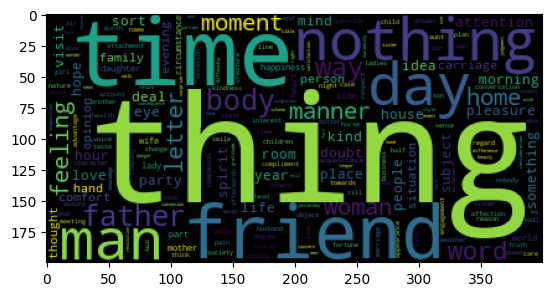

In [146]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordc = WordCloud()
wordc.generate(emma_noun)

plt.imshow(wordc)
plt.show()


- [컬럼맵]https://matplotlib.org/stable/users/explain/colors/colormaps.html


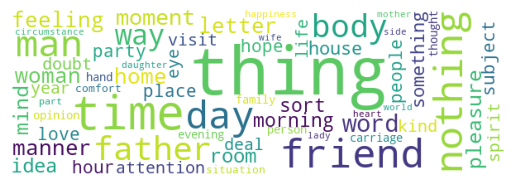

In [145]:
wordcloud = WordCloud(#font_path='',
                    width=600, # 생성될 이미지 가로(픽셀)
                    background_color='#fff', # 배경색
                    max_words=300, # 표시될 단어의 푀대갯수
                    relative_scaling=0.9, # 단어 빈도에 따른 크기 차이 조절
                    colormap='viridis', # 글자 칼라맵
                    max_font_size=80, # 최대 폰트 사이즈
                    min_font_size=10 # 최소 폰트 사이즈

                )
wordcloud.generate(emma_noun)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
%%time
# 한글 말뭉치로 data로 워드클라우드 시각화
from konlpy.tag import Hannanum, Kkma, Komoran, Okt

from mecab import MeCab

analyzer = MeCab()

# nous_list = analyzer.nouns(data)
nous_list = [word for word, tag in analyzer.pos(data) if tag in ('NNP','NNG')]
print(len(nous_list))

data_noun = ' '.join(nous_list)
data_noun[:100]






3284
CPU times: user 123 ms, sys: 10.8 ms, total: 134 ms
Wall time: 197 ms


'대한민국 헌법 역사 전통 국민 운동 건립 대한민국 임시 정부 법통 불의 항거 민주 이념 계승 조국 민주 개혁 평화 통일 사명 입각 정의 인도 동포 애 민족 단결 사회 폐습 불의 타'

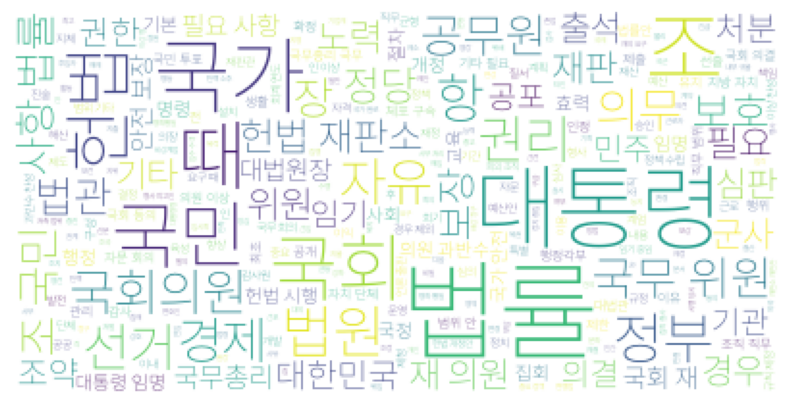

In [171]:
wordcloud = WordCloud(font_path='/Users/teamkim/Library/Fonts/Pretendard-Thin.otf',
                    # width=600, # 생성될 이미지 가로(픽셀)
                    # height=600, # 생성될 이미지 세로(픽셀)
                    background_color='#fff', # 배경색
                    max_words=300, # 표시될 단어의 푀대갯수
                    # relative_scaling=0.2, # 단어 빈도에 따른 크기 차이 조절
                    colormap='viridis', # 글자 칼라맵
                    # max_font_size=80, # 최대 폰트 사이즈
                    # min_font_size=10 # 최소 폰트 사이즈
                    # random_state=3
                )
wordcloud.generate(data_noun)
plt.figure(figsize=(18,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [182]:
# 불용어 처리(불용어지정 + 불용어사전)
from wordcloud import STOPWORDS
# type(STOPWORDS) # 자료형 set
불용어 = STOPWORDS | {'대통령', '법률'} # | : 집합합연산자
불용어 = {'대통령', '법률'}
불용어 = set(['대통령','법률','조','항'])
불용어


{'대통령', '법률', '조', '항'}

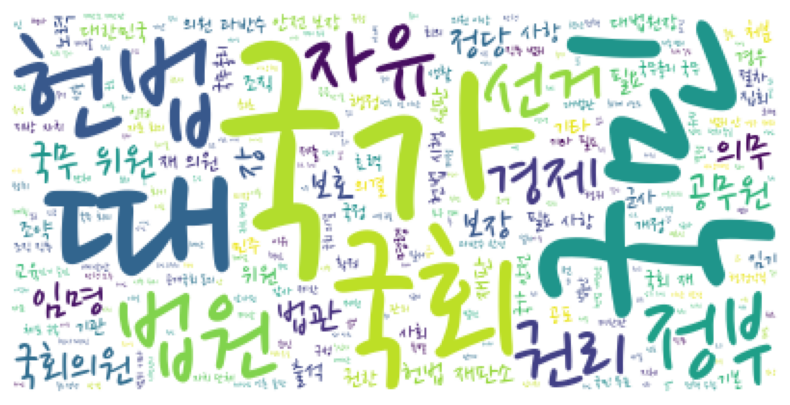

In [184]:
from nltk.corpus import stopwords


wordcloud = WordCloud(font_path='./data/NanumPenScript-Regular.ttf',
                    # width=600, # 생성될 이미지 가로(픽셀)
                    # height=600, # 생성될 이미지 세로(픽셀)
                    background_color='#fff', # 배경색
                    max_words=300, # 표시될 단어의 푀대갯수
                    # relative_scaling=0.2, # 단어 빈도에 따른 크기 차이 조절
                    colormap='viridis', # 글자 칼라맵
                    # max_font_size=80, # 최대 폰트 사이즈
                    # min_font_size=10 # 최소 폰트 사이즈
                    # random_state=3
                    stopwords=불용어,
                    
                )
wordcloud.generate(data_noun)
plt.figure(figsize=(18,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()